In [1]:
env = "GaussianGridworld-v0"
alg = "gaifo"
seeds = "_0_1_2_"
best = True

In [2]:
import pickle
import sys
sys.path.insert(0, "../../code/")
from utils import plot
import numpy as np

In [3]:
if best:
    with open("DataCompareAlphas" + env + seeds + alg  + "best.p", "rb") as f:
        data = pickle.load(f)
else:
    with open("DataCompareAlphas" + env + seeds + alg  + ".p", "rb") as f:
        data = pickle.load(f)

In [4]:
lines, std, labels = data[0], data[1], data[2]
new_labels = []
for l in labels:
    new_labels = ["1.0", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9", "expert"]
    
lines.append(-171.)
std.append(1.)

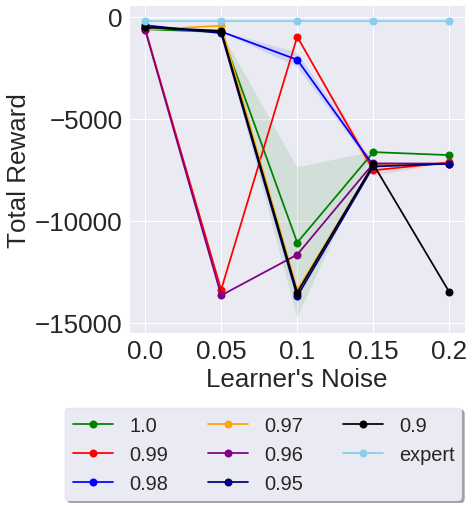

In [5]:
plot.plot_lines_and_ranges(list_to_plot=lines,
                           list_sigmas=std,
                           list_name= new_labels,
                           axis_label=["Learner's Noise", "Total Reward"],
                           folder="",
                           title=alg+env+ "best" + str(best)+seeds,
                           x_axis=["0.0", "0.05", "0.1", "0.15", "0.2"],
                           legend = True)

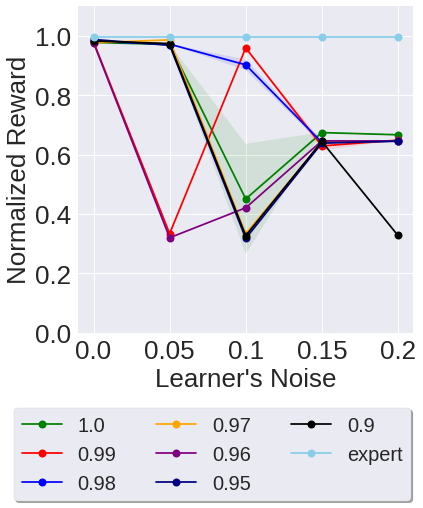

In [14]:
if best:
    with open("DataCompareAlphas" + env + seeds + alg  + "best.p", "rb") as f:
        data = pickle.load(f)
else:
    with open("DataCompareAlphas" + env + seeds + alg  + ".p", "rb") as f:
        data = pickle.load(f)
lines, std, labels = data[0], data[1], data[2]
new_labels = [ "1.0", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9", "expert"]
#lines.pop(0)
#std.pop(0)
reward_max = -171.
random_min = -20000.
delta = reward_max -random_min
for j,item in enumerate(zip(lines, std)):
    lines[j] = item[0]/delta - random_min/delta 
    std[j] = item[1]/delta #- random_min/delta 
plot.plot_lines_and_ranges(list_to_plot=lines,
                           list_sigmas=std,
                           list_name= new_labels,
                           axis_label=["Learner's Noise", "Normalized Reward"],
                           folder="",
                           title=alg+env+ "best" + str(best)+seeds+"normalized_reward",
                           x_axis=["0.0", "0.05", "0.1", "0.15", "0.2"],
                           legend = True,
                           ylim=[0,1.1])

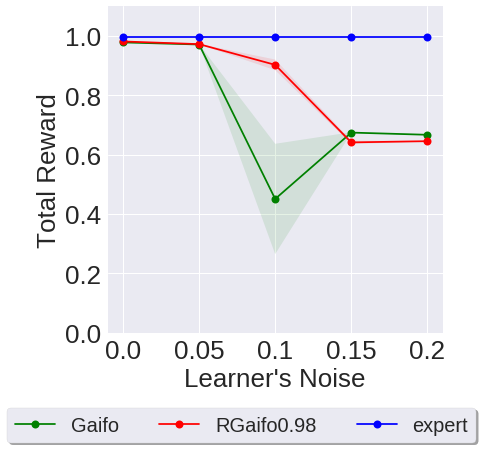

In [15]:
plot.plot_lines_and_ranges(list_to_plot=[lines[0]]+[lines[2]]+[lines[-1]],
                           list_sigmas=[std[0]] + [std[2]] + [std[-1]],
                           list_name= ["Gaifo"] + ["RGaifo" + new_labels[2]] + [new_labels[-1]],
                           axis_label=["Learner's Noise", "Total Reward"],
                           folder="",
                           title=alg+env+ "best" + str(best)+seeds+"reward_normalizedSingleBest",
                           x_axis=["0.0", "0.05", "0.1", "0.15", "0.2"],
                           legend = True,
                           ylim = [0,1.1])

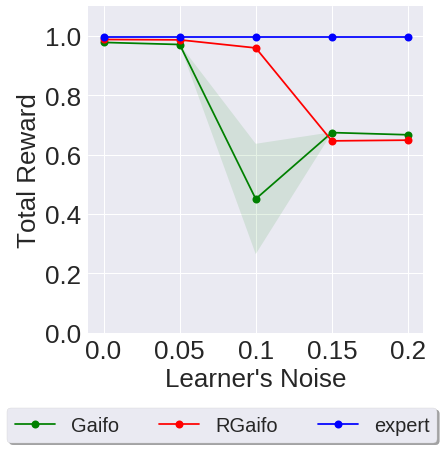

In [16]:
max_lines = np.max(lines[1:-1], axis=0)
plot.plot_lines_and_ranges(list_to_plot=[lines[0]]+[max_lines]+[lines[-1]],
                           list_sigmas=[std[0]] + [std[3]] + [std[-1]],
                           list_name= ["Gaifo"] + ["RGaifo"] + [new_labels[-1]],
                           axis_label=["Learner's Noise", "Total Reward"],
                           folder="",
                           title=alg+env+ "best" + str(best)+seeds+"reward_normalizedBest",
                           x_axis=["0.0", "0.05", "0.1", "0.15", "0.2"],
                           legend = True,
                           ylim = [0,1.1])